In [58]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [59]:
negativeAppleTweets = pd.read_csv('datasets/techTweets/negativeAppleTweets.csv')
negativeAppleTweets.drop(columns=['Unnamed: 0'], inplace=True)
negativeAppleTweets = negativeAppleTweets.drop_duplicates(subset='post_date', keep="last")
negativeAppleTweets.sort_values('post_date', inplace=True)
negativeAppleTweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,negative_sentiment
0,551602218307051520,AAPL,CashRocket,1420347191,$AVSPY looking brutal.. $AAPL $SPY,0,0,1,1
1,552107054807408640,AAPL,MarcusM08,1420467554,What the fuck $AAPL?,0,0,0,1
4,552455561342906368,AAPL,neodocjdg,1420550644,$AAPL Dead cat died? $SPY,1,0,0,1
3,552492285724987395,AAPL,shawncj6,1420559400,$AAPL dump,0,0,0,1
2,552492485617147904,AAPL,RealFanboy101,1420559448,$AAPL pathetic and weak,0,0,0,1


In [60]:
import datetime
negativeAppleTweets['Date'] = pd.to_datetime(negativeAppleTweets['post_date'],unit='s').dt.strftime('%Y-%m-%d')

In [61]:
tweetsOnAppleDateCount= negativeAppleTweets["Date"].value_counts()
tweetsOnAppleDateCount = pd.DataFrame(tweetsOnAppleDateCount)
tweetsOnAppleDateCount["count"] = tweetsOnAppleDateCount["Date"]
tweetsOnAppleDateCount.reset_index(inplace=True)
tweetsOnAppleDateCount.head()

,index,Date,count
0,2015-01-27,26,26
1,2015-07-21,20,20
2,2019-01-03,18,18
3,2015-07-09,17,17
4,2019-01-02,16,16


In [62]:
tweetsOnAppleDateCount["Date"] = tweetsOnAppleDateCount["index"]
tweetsOnAppleDateCount.drop("index",axis=1,inplace=True)
tweetsOnAppleDateCount.sort_values('Date', inplace=True)
tweetsOnAppleDateCount.head()

,Date,count
823,2015-01-04,1
856,2015-01-05,1
162,2015-01-06,3
316,2015-01-07,2
156,2015-01-08,3


In [63]:
tweetsOnAppleDateCount.last

<bound method NDFrame.last of            Date  count
823  2015-01-04      1
856  2015-01-05      1
162  2015-01-06      3
316  2015-01-07      2
156  2015-01-08      3
..          ...    ...
141  2019-12-26      4
331  2019-12-27      2
781  2019-12-29      1
768  2019-12-30      1
722  2019-12-31      1

[890 rows x 2 columns]>

In [64]:
appleDf = pd.read_csv('datasets/AAPL-2.csv')
appleDf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.018261,257142000
1,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.020525,263188400
2,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.357346,160423600
3,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.293207,237458000
4,2015-01-09,28.167500,28.312500,27.552500,28.002501,25.320332,214798000


In [65]:
df = pd.merge(tweetsOnAppleDateCount, appleDf, how='inner', on='Date')
df.head(6)

,Date,count,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,1,27.072500,27.162500,26.352501,26.562500,24.018261,257142000
1,2015-01-06,3,26.635000,26.857500,26.157499,26.565001,24.020525,263188400
2,2015-01-07,2,26.799999,27.049999,26.674999,26.937500,24.357346,160423600
3,2015-01-08,3,27.307501,28.037500,27.174999,27.972500,25.293207,237458000
4,2015-01-09,3,28.167500,28.312500,27.552500,28.002501,25.320332,214798000
5,2015-01-14,1,27.260000,27.622499,27.125000,27.450001,24.820753,195826400


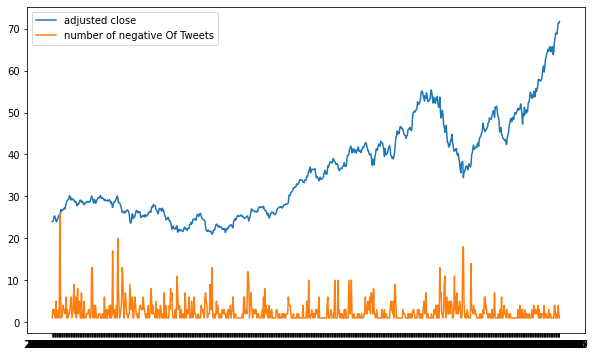

In [66]:
fig, ax = plt.subplots(figsize=(10,6))

openingValues= df["Open"]
closingValues = df["Adj Close"]
countTweet = df["count"]

dates = df["Date"]

# ax.plot(dates,openingValues,label="open")
ax.plot(dates,closingValues,label="adjusted close")
ax.plot(dates,countTweet,label="number of negative Of Tweets")

ax.legend()
fig.savefig('figures/open_close_negative_tweets.png', bbox_inches="tight")


In [80]:
from copulas.bivariate import select_copula


X = df[['count', 'Adj Close']].to_numpy()


In [81]:
from scipy.stats import spearmanr, kendalltau, pearsonr

rho = spearmanr(X[:,0],X[:,1])
tau = kendalltau(X[:,0],X[:,1])
r = pearsonr(X[:,0], X[:,1])
print(rho)
print(tau)
print(r)

SpearmanrResult(correlation=-0.15496883629531832, pvalue=1.095414523153904e-05)
KendalltauResult(correlation=-0.11404637633112136, pvalue=1.4151339337685383e-05)
(-0.13112847902993383, 0.00020362379730536623)


In [71]:
df.set_index('Date', inplace=True)
apple_daily_returns = df['Adj Close'].pct_change()
apple_daily_returns = pd.DataFrame(apple_daily_returns)
apple_daily_returns.rename(columns = {'Adj Close': 'Return'}, inplace=True)
apple_daily_returns.dropna(inplace=True)
apple_daily_returns.head()

,Return
Date,
2015-01-06,0.000094
2015-01-07,0.014022
2015-01-08,0.038422
2015-01-09,0.001072
2015-01-14,-0.019730


In [75]:
df2 = pd.merge(apple_daily_returns, tweetsOnAppleDateCount, how='inner', on='Date')
df2.head()

,Date,Return,count
0,2015-01-06,0.000094,3
1,2015-01-07,0.014022,2
2,2015-01-08,0.038422,3
3,2015-01-09,0.001072,3
4,2015-01-14,-0.019730,1


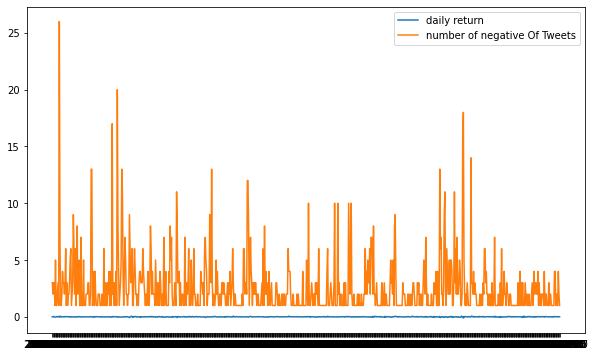

In [77]:
fig, ax = plt.subplots(figsize=(10,6))


dailyR = df2['Return']
countTweet = df2["count"]

dates = df2["Date"]

# ax.plot(dates,openingValues,label="open")
ax.plot(dates,dailyR,label="daily return")
ax.plot(dates,countTweet,label="number of negative Of Tweets")

ax.legend()

In [78]:
X = df2[['Return','count']].to_numpy()

rho = spearmanr(X[:,0],X[:,1])
tau = kendalltau(X[:,0],X[:,1])
print(rho)
print(tau)

SpearmanrResult(correlation=-0.17423467223955103, pvalue=7.45826947428269e-07)
KendalltauResult(correlation=-0.13168827529716315, pvalue=5.429427257020622e-07)
